We look at the bound on the weighted Fourier matrices given by 

$$
\|V\|\|V^{-1}\| \leq \frac{N_t}{\alpha}
$$
where $V = \Gamma^{-1}\mathbb{F}^*$, $\mathbb{F}$ is the discrete Fourier transform matrix, $\Gamma = \text{diag}(\alpha^{(n-1)/N_t})$, $n\in [1, N_t]$.

We use $N_t = 128$, $\alpha = 10^{-3}$.

In [2]:
import numpy as np

nt = 128
alpha = 1e-3

In [3]:
n = np.arange(1, nt+1)
gamma = np.diag(alpha ** ((n-1)/nt))

F = np.fft.fft(np.eye(nt)) / np.sqrt(nt)

F_star = F.conj().T

V = np.linalg.inv(gamma) @ F_star

V_norm = np.linalg.norm(V, np.inf)
Vinv_norm = np.linalg.norm(np.linalg.inv(V), np.inf)

print("V norm:", V_norm)
print("V-1 norm:", Vinv_norm)


V norm: 10719.326142685288
V-1 norm: 1.6807362961102406


In [4]:
print(V_norm * Vinv_norm, nt/alpha)

18016.360517854544 128000.0


We now vary $\alpha$ in the range $[10^{-6}, 10^{-1}]$

In [5]:
alpha_range = np.logspace(-6, -1, 200)
norms = []
for alpha in alpha_range:
    n = np.arange(1, nt+1)
    gamma = np.diag(alpha ** ((n-1)/nt))

    F = np.fft.fft(np.eye(nt)) / np.sqrt(nt)

    F_star = F.conj().T

    V = np.linalg.inv(gamma) @ F_star

    V_norm = np.linalg.norm(V, np.inf)
    Vinv_norm = np.linalg.norm(np.linalg.inv(V), np.inf)

    norms.append(V_norm * Vinv_norm)
    

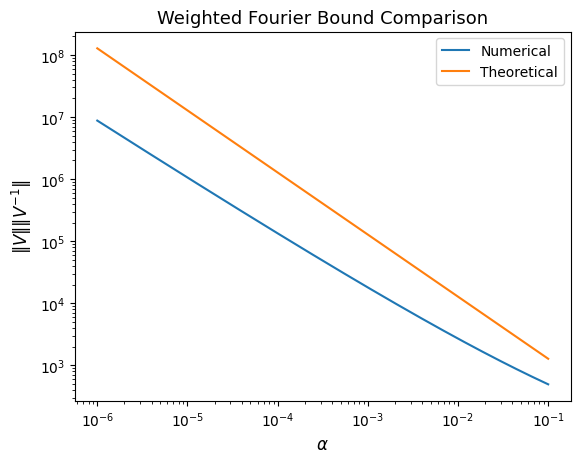

In [8]:
import matplotlib.pyplot as plt

theoretical_bound = nt/alpha_range
fig, ax = plt.subplots()
ax.plot(alpha_range, norms, label='Numerical')
ax.plot(alpha_range, theoretical_bound, label='Theoretical')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r"$\alpha$", fontsize=12)
ax.set_ylabel(r"$\|V\|\|V^{-1}\|$", fontsize=12)
ax.set_title("Weighted Fourier Bound Comparison", fontsize=13)

ax.legend()
plt.show()


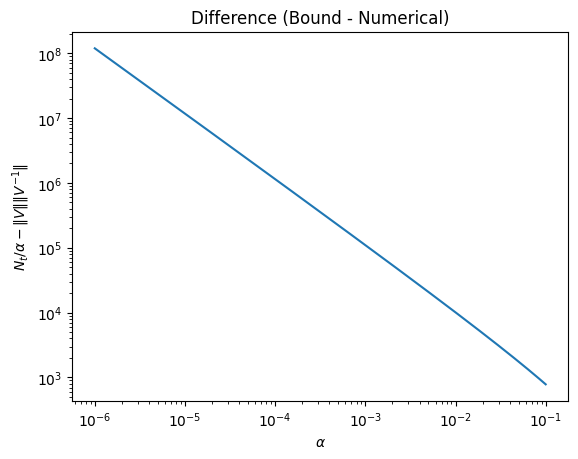

In [14]:
fig, ax = plt.subplots()
ax.plot(alpha_range, theoretical_bound - np.array(norms))

ax.set_xlabel(r"$\alpha$")
ax.set_ylabel(r"$N_t/\alpha - \|V\|\|V^{-1}\|$")
ax.set_title(r"Difference (Bound - Numerical)")

ax.set_xscale('log')
ax.set_yscale('log')

plt.show()